In [325]:
import matplotlib.pyplot as plt

import numpy as np
import random as rnd

# –ß—Ç–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –∏–∑ —Ñ–∞–π–ª–∞
with open('var_16_lognorm.csv', 'r') as f:
    data = [float(line.strip()) for line in f.readlines()]


–ó–¥–µ—Å—å –±—É–¥–µ—Ç –ø–æ–ø—ã—Ç–∫–∞ –ø–æ–ª—É—á–∏—Ç—å —Ç–µ –∂–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –æ–±—Ä–µ–∑–∞–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏

In [326]:
# creating class for Data
class Statistics:
    def __init__(self, data: list, name: str):
        self.dataName = name
        self.dataArr = sorted(data)[:250]
        self.dataLen = len(data)
        self.getAllParams()
        
    def dataSum(self):
        self.sum = sum(self.dataArr)
        return self.sum
    
    def dataMean(self):
        summ = self.dataSum()
        self.mean = summ / self.dataLen
        return self.mean
    
    def dataMedian(self):
        sortedData = sorted(self.dataArr)
        if self.dataLen % 2 == 0:
            # –µ—Å–ª–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ —á–µ—Ç–Ω–æ–µ, –±–µ—Ä–µ–º —Å—Ä–µ–¥–Ω–µ–µ –¥–≤—É—Ö —Å—Ä–µ–¥–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π
            mid = self.dataLen // 2
            self.median = (sortedData[mid-1] + sortedData[mid]) / 2
        else:
            # –µ—Å–ª–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –Ω–µ—á–µ—Ç–Ω–æ–µ, –±–µ—Ä–µ–º —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ
            self.median = sortedData[self.dataLen//2]
        return self.median
    
    def dataModa(self):
        # –°–æ–∑–¥–∞–µ–º —Å–ª–æ–≤–∞—Ä—å, –≥–¥–µ –∫–ª—é—á–∏ - —ç–ª–µ–º–µ–Ω—Ç—ã —Å–ø–∏—Å–∫–∞, –∞ –∑–Ω–∞—á–µ–Ω–∏—è - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ö –ø–æ–≤—Ç–æ—Ä–µ–Ω–∏–π
        countDict = {}
        for i in self.dataArr:
            if i in countDict:
                countDict[i] += 1
            else:
                countDict[i] = 1
        # –ù–∞—Ö–æ–¥–∏–º —ç–ª–µ–º–µ–Ω—Ç(—ã) —Å –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –ø–æ–≤—Ç–æ—Ä–µ–Ω–∏–π
        max_count = max(countDict.values())
        self.modes = []
        for key, value in countDict.items():
            if value == max_count:
                self.modes.append(key)

        # –í–æ–∑–≤—Ä–∞—â–∞–µ–º –º–æ–¥—É(—ã)
        return self.modes
    
    def dataRange(self):
        self.range = max(self.dataArr) - min(self.dataArr)
        return self.range
    
    def dataBiasedVariance(self):
        mean = self.dataMean()
        squared_differences_sum = sum([(x - mean) ** 2 for x in self.dataArr])
        self.biasedVariance = squared_differences_sum / (self.dataLen)
        return self.biasedVariance
    
    def dataUnbiasedVariance(self):
        mean = self.dataMean()
        squared_differences_sum = sum([(x - mean) ** 2 for x in self.dataArr])
        self.unbiasedVariance = squared_differences_sum / (self.dataLen - 1)
        return self.unbiasedVariance
    
    def dataStartMoment(self, k):
        moment = sum([x**k for x in self.dataArr])/self.dataLen
        return moment
    
    def dataCenterMoment(self, k):
        mean = self.dataMean()
        moment = sum([(x - mean) ** k for x in self.dataArr])/self.dataLen
        return moment
    
    def getAllParams(self):
        self.dataSum()
        self.dataMean()
        self.dataMedian()
        self.dataModa()
        self.dataRange()
        self.dataBiasedVariance()
        self.dataUnbiasedVariance()

    def printAllParams(self, printStats:bool = False, printGraphics:bool = False):
        self.getAllParams()
        print('='*100)
        print(f"Statistics for data: {self.dataName}")

        if printStats:
            print("Data mean is", self.mean)
            print("Data median is", self.median)
            print("Data moda is", self.modes)
            print("Data range is", self.range)
            print("Data Biased Variance is", self.biasedVariance)
            print("Data Unbiased Variance is", self.unbiasedVariance)
            print("Data start moment is", self.dataStartMoment(2))
            print("Data center moment is", self.dataCenterMoment(2))

        if printGraphics:
            fig, ax = plt.subplots(figsize=(12, 6))
            ax.hist(self.dataArr, bins=range(int(min(self.dataArr)), int(max(self.dataArr)), 1), density=True)

            # –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –≤–Ω–µ—à–Ω–µ–≥–æ –≤–∏–¥–∞ –≥—Ä–∞—Ñ–∏–∫–∞
            ax.set_xlabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
            ax.set_ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏')
            ax.set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ')

            # –í—ã–≤–æ–¥ –≥—Ä–∞—Ñ–∏–∫–∞ –Ω–∞ —ç–∫—Ä–∞–Ω
            plt.show()
        print('='*100)
   
    def histogramm(self, columns:int=20, printMPL:bool = True, printOWN:bool = False, print_OWN_MPL:bool = False):
        data_array = sorted(self.dataArr)
        data_min = min(data_array)
        data_max = max(data_array)
        data_range = data_max-data_min
        data_step = data_range/columns
        data_cpy = data_array.copy()
        if(printOWN):
            data_columns = [[] for i in range(columns)]
            data_tmp = data_min
            for column_number in range(columns):
                elem_to_delete = []
                for i in range(len(data_cpy)):
                    if data_cpy[i] >= data_tmp and data_cpy[i] < data_tmp + data_step:
                        data_columns[column_number].append(data_cpy[i])
                        elem_to_delete.append(data_cpy[i])
                for el in elem_to_delete:
                    data_cpy.remove(el)
                data_tmp += data_step
            
            if(len(data_cpy) > 0):
                for i in range(len(data_cpy)):
                    data_columns[-1].append(data_cpy[i])

            data_columns_probability = [len(i) for i in data_columns]
            
            max_prob = max(data_columns_probability)
            if max_prob == 0:
                return # –Ω–µ—Ç –∑–Ω–∞—á–µ–Ω–∏–π, –Ω–µ—á–µ–≥–æ –≤—ã–≤–æ–¥–∏—Ç—å

            column_width = 14
            string_down = "\033[30m\033[47m{:>6}‚ïö".format(0)
            string_down += '‚ïê' * column_width * (columns+1) + "‚ñ∫ –ó–Ω–∞—á–µ–Ω–∏–µ —Å–ª—É—á–∞–π–Ω–æ–π –≤–µ–ª–∏—á–∏–Ω—ã "
            str_len = len(string_down)

            str_tmp = "\033[30m\033[47m      " + " "*column_width * (columns//2) +"–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –≤—ã–±–æ—Ä–∫–∏" 
            print(str_tmp + " " *(str_len-len(str_tmp)))
            str_tmp = " –í—Å—Ç—Ä–µ—Ç–∏–ª–æ—Å—å "
            print(str_tmp + " " *(str_len-len(str_tmp)-10))
            str_tmp = "—Ä–∞–∑ –≤ –≤—ã–±–æ—Ä–∫–µ"
            print(str_tmp + " " *(str_len-len(str_tmp)-10))
            print("      ‚ñ≤" + " " * (str_len-17))
            print("      ‚ïë" + " " * (str_len-17))
            
            additional_step = 1
            if max_prob > 50:
                additional_step = 5
            if max_prob > 100:
                additional_step = 10
            y_max = (max_prob//additional_step + 1 )*(additional_step)
            for y in range(0, y_max, additional_step):
                
                string = "\033[30m\033[47m{:>6}‚ïë".format(y_max - y)
                string += ' ' * (column_width//2)
                for i in range(columns):
                    if(data_columns_probability[i] >= y_max - y):
                        string += '\033[36m\033[47m‚ñà' * column_width
                    elif(data_columns_probability[i] >= 1 and (y_max - y) <= additional_step):
                        string += '\033[36m\033[47m‚ñÑ' * column_width
                    else:
                        string += '\033[36m\033[47m ' * column_width
                string += ' ' * 37
                print(string)
            # string_down = "\033[30m\033[47m{:>6}‚ïö".format(0)
            # string_down += '‚ïê' * column_width * (columns+1) + "‚ñ∫ –ó–Ω–∞—á–µ–Ω–∏–µ —Å–ª—É—á–∞–π–Ω–æ–π –≤–µ–ª–∏—á–∏–Ω—ã "
                        
            print(string_down)
            X_axes_str = [data_min + data_step * i for i in range(columns+1)]
            string_down2 = "       "
            for i in X_axes_str:
                string_down2 += "{:^14.2f}".format(i) 
            string_down2 += " "*30
            print(string_down2)

        if printMPL:
            fig, ax = plt.subplots(figsize=(12, 6))
            ax.hist(data_array, bins=columns)

            # –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –≤–Ω–µ—à–Ω–µ–≥–æ –≤–∏–¥–∞ –≥—Ä–∞—Ñ–∏–∫–∞
            ax.set_xlabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
            ax.set_ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏')
            ax.set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ')

            # –í—ã–≤–æ–¥ –≥—Ä–∞—Ñ–∏–∫–∞ –Ω–∞ —ç–∫—Ä–∞–Ω
            plt.show()
    def f_rightness(self, x_i, mu, omega):
        alpha = 1/(x_i*omega*((2*np.pi)**0.5))
        beta = - (((np.log(x_i)-mu)/omega)**2)/(2)
        return alpha*(np.exp(beta))
    def L_rightness(self, mu, omega):
        L = np.float128(1);
        for x in data:
            L *= (self.f_rightness(x+0.00000001, mu, omega))
        return L;
        

classedOldData = Statistics(data, 'Read data')
classedOldData.printAllParams(printStats= True)

data_unbias = [data[i] - min(data) + 0.01 for i in range(len(data))]
classedUnbiasedData = Statistics(data_unbias, 'Unbiased Read data')
classedUnbiasedData.printAllParams(printStats= True)

Statistics for data: Read data
Data mean is 16.76345065333333
Data median is 9.5922675
Data moda is [8.98]
Data range is 189.61139300000002
Data Biased Variance is 795.9632838215521
Data Unbiased Variance is 798.6253683828281
Data start moment is 1123.8121079294176
Data center moment is 795.9632838215521
Statistics for data: Unbiased Read data
Data mean is 9.288450653333335
Data median is 0.6222674999999998
Data moda is [0.01]
Data range is 189.61139300000002
Data Biased Variance is 789.4720184126409
Data Unbiased Variance is 792.1123930561614
Data start moment is 890.1265532086177
Data center moment is 789.4720184126409


$$–í—ã–±–æ—Ä–æ—á–Ω–∞—è \space(—ç–º–ø–∏—Ä–∏ÃÅ—á–µ—Å–∫–∞—è)\space —Ñ—ÉÃÅ–Ω–∫—Ü–∏—è\space —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µÃÅ–Ω–∏—è\space –≤\space –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–π\space —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–µ\space ‚Äî\\\space —ç—Ç–æ\space –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏–µ\space —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–æ–π\space —Ñ—É–Ω–∫—Ü–∏–∏\space —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è,\space –ø–æ—Å—Ç—Ä–æ–µ–Ω–Ω–æ–µ \space —Å –ø–æ–º–æ—â—å—é\space –≤—ã–±–æ—Ä–∫–∏\space –∏–∑\space –Ω–µ–≥–æ.$$
$$ –ü—É—Å—Ç—å\space X_{1},\ldots ,X_{n}\space ‚Äî \space–≤—ã–±–æ—Ä–∫–∞\space –æ–±—ä—ë–º–∞\space n ,\space –ø–æ—Ä–æ–∂–¥—ë–Ω–Ω–∞—è \space—Å–ª—É—á–∞–π–Ω–æ–π\space –≤–µ–ª–∏—á–∏–Ω–æ–π \space X, \space –∑–∞–¥–∞–≤–∞–µ–º–æ–π \space —Ñ—É–Ω–∫—Ü–∏–µ–π \space —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è \space F(x) $$
$$ –ë—É–¥–µ–º\space —Å—á–∏—Ç–∞—Ç—å, \space —á—Ç–æ \space X_{i},\space –≥–¥–µ\space i \in \{1, n\}, \space n\in \N \space‚Äî \space–Ω–µ–∑–∞–≤–∏—Å–∏–º—ã–µ\space —Å–ª—É—á–∞–π–Ω—ã–µ \space–≤–µ–ª–∏—á–∏–Ω—ã,\\
–æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–µ \space –Ω–∞\space –Ω–µ–∫–æ—Ç–æ—Ä–æ–º\space –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ \space —ç–ª–µ–º–µ–Ω—Ç–∞—Ä–Ω—ã—Ö \space –∏—Å—Ö–æ–¥–æ–≤ \space \Omega $$
$$ –ü—É—Å—Ç—å \space x \in \R. \space –û–ø—Ä–µ–¥–µ–ª–∏–º \space —Ñ—É–Ω–∫—Ü–∏—é \space \hat{F}(x) \space —Å–ª–µ–¥—É—é—â–∏–º\space –æ–±—Ä–∞–∑–æ–º: $$ 
$$ \hat{F}(x) = \frac{1}{n}\sum_{i=1}^{n}\theta (x-X_{i}), \space –≥–¥–µ $$
$$ \theta (x)={\begin{cases}0,&x<0;\\1,&x\geqslant 0.\end{cases}}\space  ‚Äî\space  –§—É–Ω–∫—Ü–∏—è \space –•–µ–≤–∏—Å–∞–π–¥–∞  $$


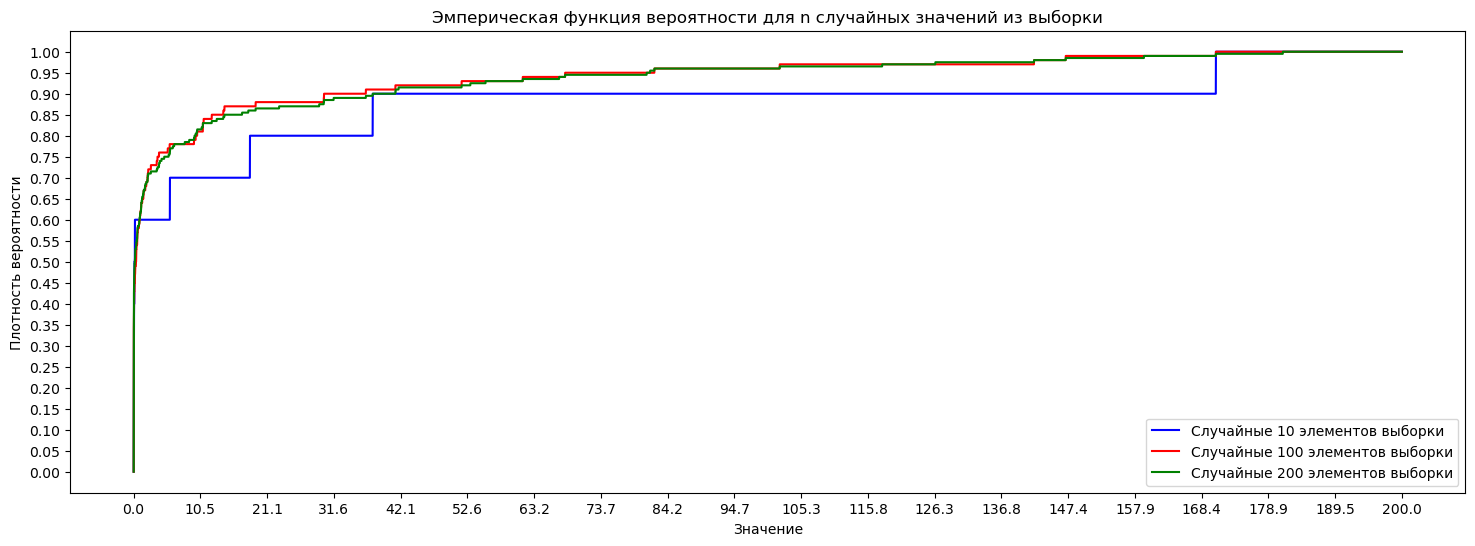

In [327]:
# –ø–ª–æ—Ç–Ω–æ—Å—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏

rnd.seed(0)

def Heviside(x):
    if(x<0):
        return 0
    return 1

def f_hat(x, dataSet: Statistics):
    s = 0
    for xi in sorted(dataSet.dataArr):
        s += Heviside(x-xi)
    return s/dataSet.dataLen

def getRandomArr(dataSet: Statistics, len):
    result= rnd.sample(dataSet.dataArr, len)
    return result

dataRand_10 = getRandomArr(classedUnbiasedData, 10)
classedRandData_10 = Statistics(dataRand_10, '–°–ª—É—á–∞–π–Ω—ã–µ 10 —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≤—ã–±–æ—Ä–∫–∏')
dataRand_100 = getRandomArr(classedUnbiasedData, 100)
classedRandData_100 = Statistics(dataRand_100, '–°–ª—É—á–∞–π–Ω—ã–µ 100 —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≤—ã–±–æ—Ä–∫–∏')
dataRand_200 = getRandomArr(classedUnbiasedData, 200)
classedRandData_200 = Statistics(dataRand_200, '–°–ª—É—á–∞–π–Ω—ã–µ 200 —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≤—ã–±–æ—Ä–∫–∏')

right_border = 200 # –ø–æ—Å—Ç–∞–≤–∏—Ç—å 20–∫ –∏–ª–∏ 200–∫ –¥–ª—è –¥–∞–ª—å–Ω–µ–≥–æ –≤–∏–¥–∞
left_border = 0
X = np.linspace(0.001 + left_border,right_border, num=10000)
# step = 100
# X = [a/step for a in range(0, 100*step)]
Y_10 = [f_hat(a, classedRandData_10) for a in X]
Y_100 = [f_hat(a, classedRandData_100) for a in X]
Y_200 = [f_hat(a, classedRandData_200) for a in X]

fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(X, Y_10, color='blue', label=f'{classedRandData_10.dataName}')
ax.plot(X, Y_100, color='red', label=f'{classedRandData_100.dataName}')
ax.plot(X, Y_200, color='green', label=f'{classedRandData_200.dataName}')

xt = np.linspace(left_border, right_border, num=20)
yt = [a/100 for a in range(0, 101, 5)]
ax.set_xticks(xt)
ax.set_yticks(yt)
# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –≤–Ω–µ—à–Ω–µ–≥–æ –≤–∏–¥–∞ –≥—Ä–∞—Ñ–∏–∫–∞
ax.set_xlabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
ax.set_ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏')
ax.set_title('–≠–º–ø–µ—Ä–∏—á–µ—Å–∫–∞—è —Ñ—É–Ω–∫—Ü–∏—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –¥–ª—è n —Å–ª—É—á–∞–π–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –∏–∑ –≤—ã–±–æ—Ä–∫–∏')
ax.legend()

# –í—ã–≤–æ–¥ –≥—Ä–∞—Ñ–∏–∫–∞ –Ω–∞ —ç–∫—Ä–∞–Ω
plt.show()

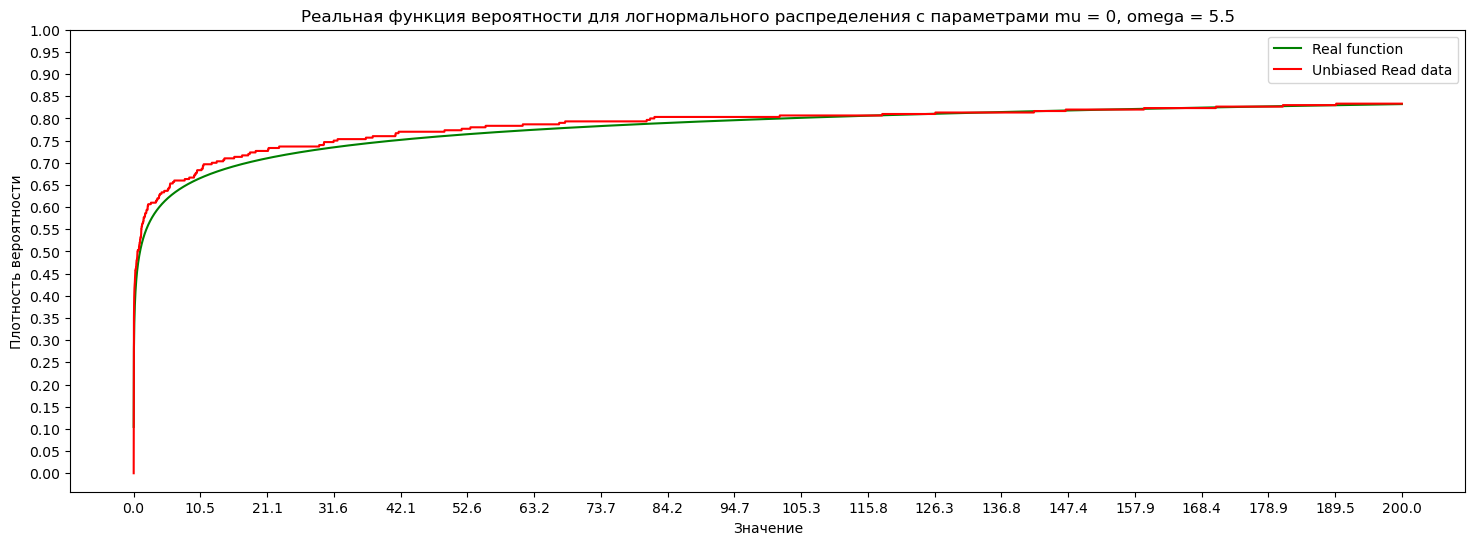

In [328]:
# —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∞—è —Ñ—É–Ω–∫—Ü–∏—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏
import scipy as scp

def F_real(x, mu, sco, bias = 0):
    res = 1/2 + (scp.special.erf((np.log(x-bias)-mu)/(sco*(2**0.5))))/2
    return res

mu = 0
sco = 5.5
Y_real = [F_real(x, mu, sco) for x in X]

# bias = 8.9
# X_biased = np.linspace(0.001+bias+left_border,right_border, num=10000)
# Y_real_biased = [F_real(x, mu, sco, bias) for x in X_biased]

Y_read = [f_hat(a, classedUnbiasedData) for a in X]

fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(X, Y_real, color='green', label=f'Real function')
ax.plot(X, Y_read, color='red', label=f'{classedUnbiasedData.dataName}')
# ax.plot(X_biased, Y_real_biased, color='blue', label=f'Real biassed function')
# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –≤–Ω–µ—à–Ω–µ–≥–æ –≤–∏–¥–∞ –≥—Ä–∞—Ñ–∏–∫–∞
ax.set_xlabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
ax.set_ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏')
ax.set_title(f'–†–µ–∞–ª—å–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –¥–ª—è –ª–æ–≥–Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ mu = {mu}, omega = {sco}')
ax.set_xticks(xt)
ax.set_yticks(yt)
ax.legend()

# –í—ã–≤–æ–¥ –≥—Ä–∞—Ñ–∏–∫–∞ –Ω–∞ —ç–∫—Ä–∞–Ω
plt.show()

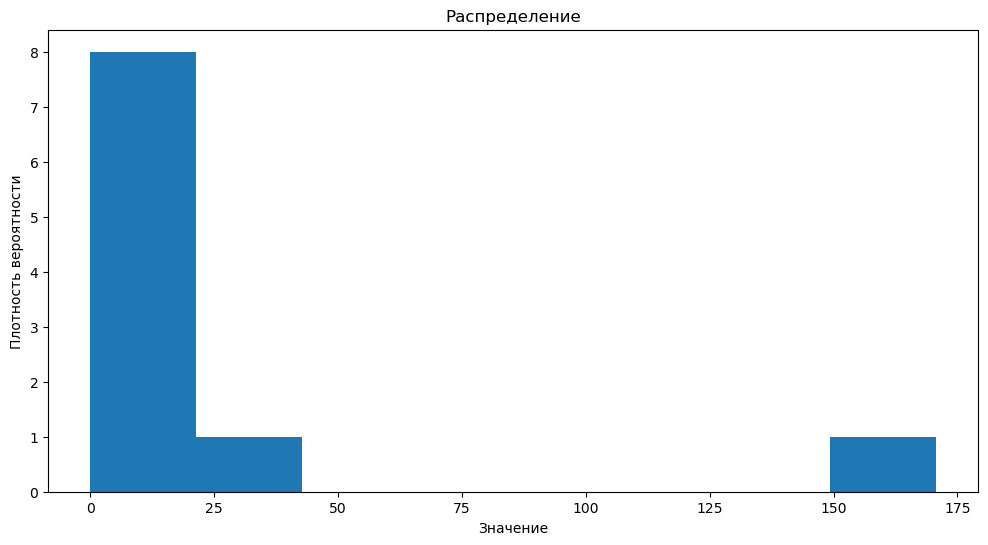

8


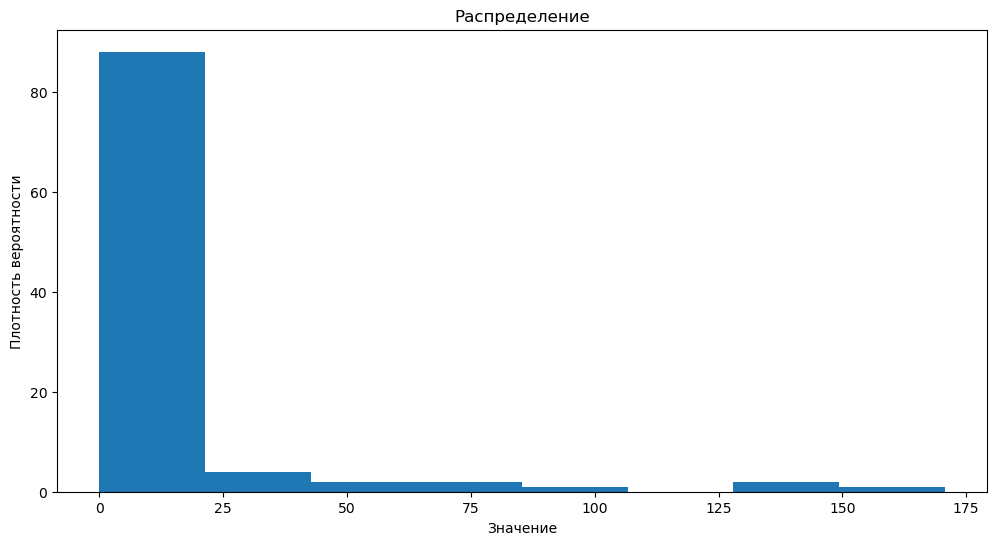

8


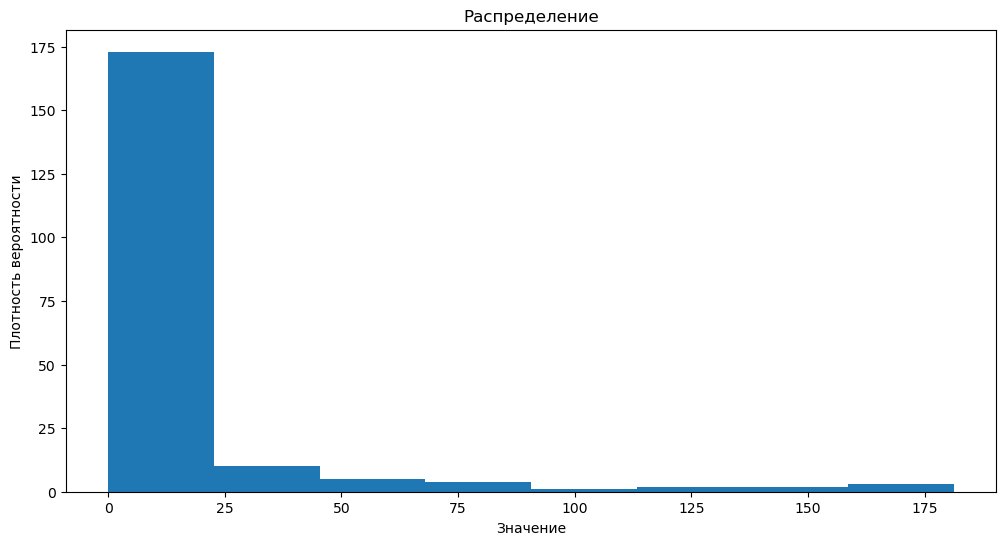

8


In [329]:
  
somedata = [rnd.randint(0, 100) for i in range (100)]
classedReallyRandomData = Statistics(somedata, name="Really random data")
# classedReallyRandomData.histogramm(columns=10)

# classedRandData_10.histogramm(columns=10);
# classedRandData_100.histogramm(columns=10);
# classedRandData_200.histogramm(columns=10);
classedRandData_10.histogramm(columns=(1 + int(np.log2(classedRandData_10.range))),printMPL=True);
print((1 + int(np.log2(classedRandData_10.range))))
classedRandData_100.histogramm(columns=(1 + int(np.log2(classedRandData_100.range))),printMPL=True);
print((1 + int(np.log2(classedRandData_100.range))))
classedRandData_200.histogramm(columns=(1 + int(np.log2(classedRandData_200.range))),printMPL=True);
print((1 + int(np.log2(classedRandData_200.range))))

6. –ü–æ–Ω—è—Ç–∏–µ —Ç–æ—á–µ—á–Ω—ã—Ö –æ—Ü–µ–Ω–æ–∫.  
    1. –û—Ü–µ–Ω–∏—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤—ã–±–æ—Ä–∫–∏ –º–µ—Ç–æ–¥–æ–º –º–æ–º–µ–Ω—Ç–æ–≤.   
    2. –û—Ü–µ–Ω–∏—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤—ã–±–æ—Ä–∫–∏ –º–µ—Ç–æ–¥–æ–º –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ –ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–∏—è.  
    3. –ü—Ä–∏–≤–µ—Å—Ç–∏ –∏ –æ–±–æ—Å–Ω–æ–≤–∞—Ç—å —Å–≤–æ–π—Å—Ç–≤–∞ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –æ—Ü–µ–Ω–æ–∫: –Ω–µ—Å–º–µ—â–µ–Ω–Ω–æ—Å—Ç—å, —Å–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ—Å—Ç—å, —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å, R-—ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å.   
    4. –ù–∞ –æ–¥–Ω–æ–º –≥—Ä–∞—Ñ–∏–∫–µ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å:  
        1.   —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫—É—é —Ñ—É–Ω–∫—Ü–∏—é —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å –æ—Ü–µ–Ω–∫–∞–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, –Ω–∞–π–¥–µ–Ω–Ω—ã–º–∏ –º–µ—Ç–æ–¥–æ–º –º–æ–º–µ–Ω—Ç–æ–≤;  
        2.   —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫—É—é —Ñ—É–Ω–∫—Ü–∏—é —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å –æ—Ü–µ–Ω–∫–∞–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, –Ω–∞–π–¥–µ–Ω–Ω—ã–º–∏ –º–µ—Ç–æ–¥–æ–º –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ –ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–∏—è;  
        3.   —ç–º–ø–∏—Ä–∏—á–µ—Å–∫—É—é —Ñ—É–Ω–∫—Ü–∏—é —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è (–ø–æ –≤—Å–µ–π –≤—ã–±–æ—Ä–∫–µ). –ü–æ—Å—Ç—Ä–æ–µ–Ω–Ω—ã–π –≥—Ä–∞—Ñ–∏–∫ –¥–æ–ª–∂–µ–Ω —Å–æ–¥–µ—Ä–∂–∞—Ç—å –Ω–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ, –ø–æ–¥–ø–∏—Å—å –æ—Å–µ–π, –ª–µ–≥–µ–Ω–¥—É.  
    5. –ó–∞–Ω–µ—Å—Ç–∏ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –∏ –≥—Ä–∞—Ñ–∏–∫ –≤ –æ—Ç—á–µ—Ç.  
    6. –°–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥ –æ –∑–Ω–∞—á–µ–Ω–∏–∏ –æ—Ü–µ–Ω–æ–∫ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∏ —Å—Ö–æ–∂–µ—Å—Ç–∏ —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–π –∏ —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏—Ö —Ñ—É–Ω–∫—Ü–∏–π —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.  

mu = 1.061861702728239 ; omega = 1.527684561972372
mu = -1.137824382761229 ; omega = 1.2950104883127607


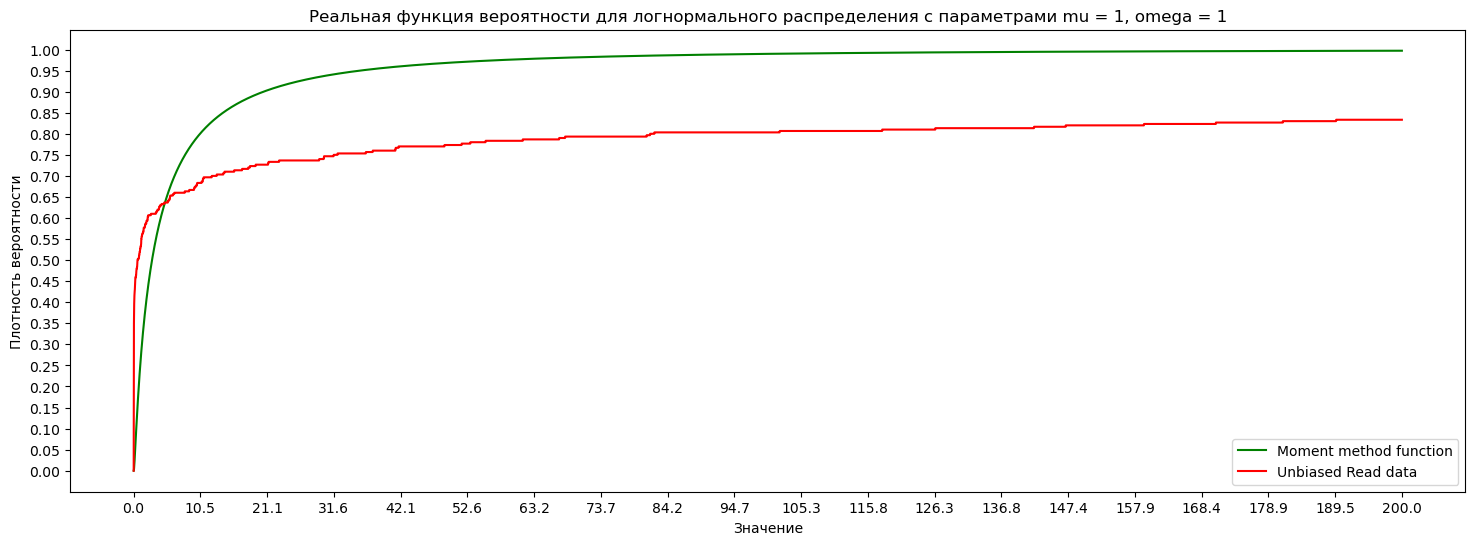

In [339]:
# –º–µ—Ç–æ–¥ –º–æ–º–µ–Ω—Ç–æ–≤
def realMomentStartPowK(K, mu, sco):
    return np.e ** (K * mu + K*K*sco*sco/2)

def momentMethod(dataSet: Statistics):
    # E(X) = mean(X)
    # E(X^2) = mean(X^2)
    # mu + sco^2 / 2 = ln(mX)
    # 2mu + sco^2 * 2 = ln(mX^2)  
    # sco = sqrt(ln(mX^2)-2ln(mX))
    # mu = 2ln(mX)-0.5ln(mX^2)
    mX = dataSet.dataStartMoment(1)
    mX2 = dataSet.dataStartMoment(2)
    mu = 2 * np.log(mX) - 0.5 * np.log(mX2)
    sco = np.sqrt(np.log(mX2) - 2 * np.log(mX))
    print('mu =', str(mu), '; omega =', str(sco))

momentMethod(classedUnbiasedData)
data_new = sorted(data_unbias)[:200]
classedNewDat = Statistics(data_new, '–æ–±—Ä–µ–∑–∞–Ω–Ω–∞—è data')
momentMethod(classedNewDat)

Y_real = [F_real(x, 1.061861702728239, 1.527684561972372) for x in X]
Y_real2 = [F_real(x, -1.137824382761229, 1.2950104883127607) for x in X]
Y_read = [f_hat(a, classedUnbiasedData) for a in X]
Y_read2 = [f_hat(a, classedNewDat) for a in X]

our_data = classedUnbiasedData

fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(X, Y_real, color='green', label=f'Moment method function')
# ax.plot(X, Y_real2, color='magenta', label=f'Real2 function')
ax.plot(X, Y_read, color='red', label=f'{classedUnbiasedData.dataName}')
# ax.plot(X, Y_read2, color='blue', label=f'{classedNewDat.dataName}')
# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –≤–Ω–µ—à–Ω–µ–≥–æ –≤–∏–¥–∞ –≥—Ä–∞—Ñ–∏–∫–∞
ax.set_xlabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
ax.set_ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏')
ax.set_title(f'–†–µ–∞–ª—å–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –¥–ª—è –ª–æ–≥–Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ mu = {mu}, omega = {sco}')
ax.set_xticks(xt)
ax.set_yticks(yt)
ax.legend()

# –í—ã–≤–æ–¥ –≥—Ä–∞—Ñ–∏–∫–∞ –Ω–∞ —ç–∫—Ä–∞–Ω
plt.show()



Statistics for data: –æ–±—Ä–µ–∑–∞–Ω–Ω–∞—è data
Data mean is 0.7413382349999996
Data median is 0.03766349999999918
Data moda is [0.01]
Data range is 8.733761999999999
Data Biased Variance is 2.39055281388809
Data Unbiased Variance is 2.402565642098583
Data start moment is 2.940135192561004
Data center moment is 2.39055281388809
E(X) = 1.1331484530668263
Median = 1.0
Moda = 0.7788007830714049
D(X) = 0.3646958540123865


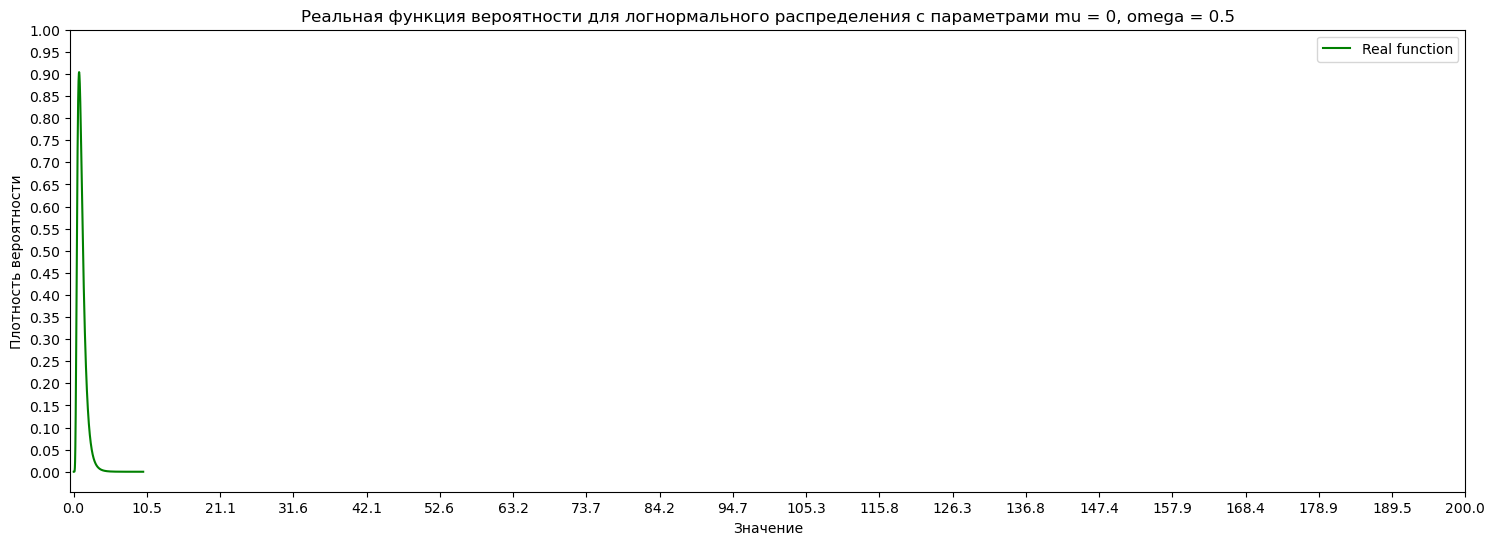

In [341]:
Y_real = []

def func(x, mu, sco):
    a = np.exp(-(((np.log(x)-mu)/sco)**2)/2)
    b = x * sco * np.sqrt(np.pi * 2)
    return a/b

mu = 0
sco = 1/2#np.sqrt(2)
Y_hist = []
for x in range(1, 1000000):
    for kolvo in range(int(100*func(x/100, mu, sco))):
        Y_real.append(x/100)
for x in range(1, 1000):
    Y_hist.append((func(x/100, mu, sco)))

# classedNewDat = Statistics(Y_real, 'test data')
# momentMethod(classedNewDat)
classedNewDat.printAllParams(printStats= True);

print('E(X) =', str(np.exp(mu+sco*sco/2)))
print('Median =', str(np.exp(mu)))
print('Moda =', str(np.exp(mu-sco*sco)))
print('D(X) =', str(np.exp(2*mu+sco*sco)*(np.exp(sco*sco)-1)))

fig, ax = plt.subplots(figsize=(18, 6))
ax.plot([x/100 for x in range(1, 1000)], Y_hist, color='green', label=f'Real function')
ax.set_xlabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
ax.set_ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏')
ax.set_title(f'–†–µ–∞–ª—å–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –¥–ª—è –ª–æ–≥–Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ mu = {mu}, omega = {sco}')
# xt = np.linspace(0, 10, num=40)
ax.set_xticks(xt)
ax.set_yticks(yt)
ax.legend()

# –í—ã–≤–æ–¥ –≥—Ä–∞—Ñ–∏–∫–∞ –Ω–∞ —ç–∫—Ä–∞–Ω
plt.show()


In [342]:
# –º–µ—Ç–æ–¥ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ –ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–∏—è
mu = sum([np.log(our_data.dataArr[i]) for i in range (len(our_data.dataArr))])/len(our_data.dataArr)
s—Åo2 = sum([(np.log(our_data.dataArr[i])-mu)**2 for i in range (len(our_data.dataArr))])/len(our_data.dataArr)
s—Åo = np.sqrt(s—Åo2)
print(mu, s—Åo)

-1.2805172532121836 3.128912067938031


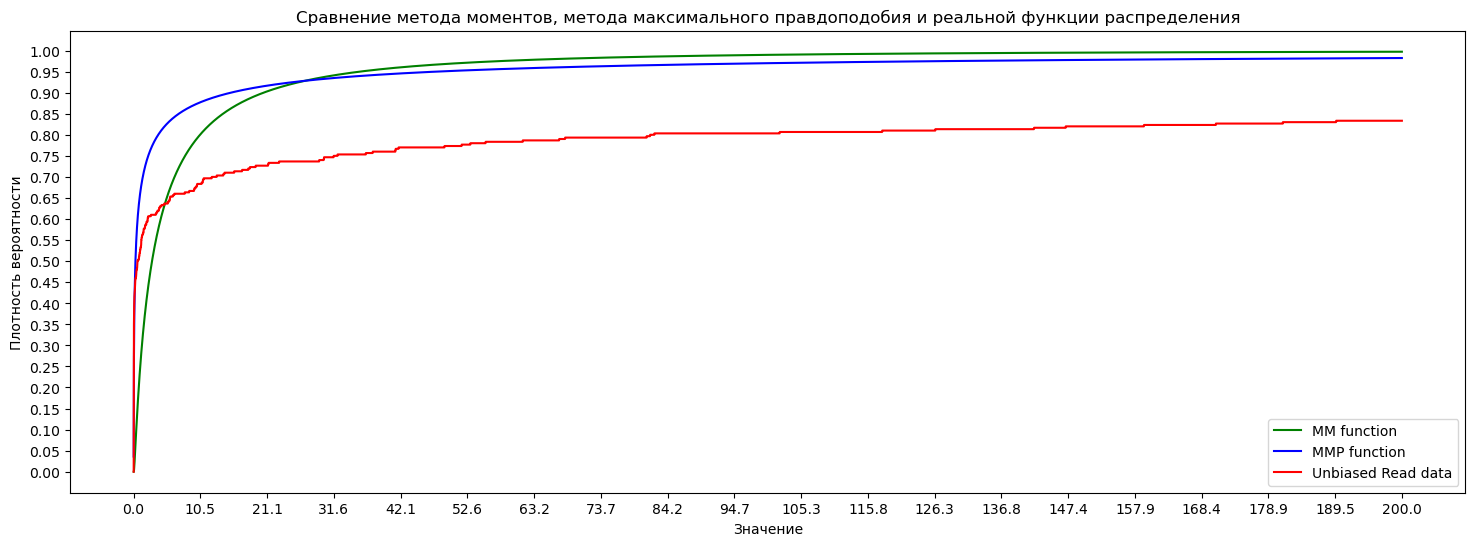

In [344]:
Y_real = [F_real(x, 1.061861702728239, 1.527684561972372) for x in X]
Y_real2 = [F_real(x, -1.2805172532121836, 3.128912067938031) for x in X]
Y_read = [f_hat(a, our_data) for a in X]

mu = 0.35
sco = 4.78

fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(X, Y_real, color='green', label=f'MM function')
ax.plot(X, Y_real2, color='blue', label=f'MMP function')
ax.plot(X, Y_read, color='red', label=f'{our_data.dataName}')
# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –≤–Ω–µ—à–Ω–µ–≥–æ –≤–∏–¥–∞ –≥—Ä–∞—Ñ–∏–∫–∞
ax.set_xlabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
ax.set_ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏')
ax.set_title(f'–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–µ—Ç–æ–¥–∞ –º–æ–º–µ–Ω—Ç–æ–≤, –º–µ—Ç–æ–¥–∞ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ –ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–∏—è –∏ —Ä–µ–∞–ª—å–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è')
ax.set_xticks(xt)
ax.set_yticks(yt)
ax.legend()

# –í—ã–≤–æ–¥ –≥—Ä–∞—Ñ–∏–∫–∞ –Ω–∞ —ç–∫—Ä–∞–Ω
plt.show()

# –≤—ã–≤–æ–¥ - –ú–ú —Ö—É–µ—Ç–∞

7. –ü–æ–Ω—è—Ç–∏–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—å–Ω—ã—Ö –æ—Ü–µ–Ω–æ–∫. 
    1. –û—Ü–µ–Ω–∏—Ç—å  –ø–∞—Ä–∞–º–µ—Ç—Ä—ã  —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è  –≤—ã–±–æ—Ä–∫–∏  —Å  –ø–æ–º–æ—â—å—é  –∏–Ω—Ç–µ—Ä–≤–∞–ª—å–Ω–æ–π  –æ—Ü–µ–Ω–∫–∏  —Å —É—Ä–æ–≤–Ω—è–º–∏ –¥–æ–≤–µ—Ä–∏—è ùõæ1=0,95, ùõæ2=0,99  
    2. –ó–∞–Ω–µ—Å—Ç–∏ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –≤ –æ—Ç—á–µ—Ç. 
    3. –°–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥ –æ –±–ª–∏–∑–æ—Å—Ç–∏ –∑–Ω–∞—á–µ–Ω–∏–π –∏–Ω—Ç–µ—Ä–≤–∞–ª—å–Ω—ã—Ö –∏ —Ç–æ—á–µ—á–Ω—ã—Ö –æ—Ü–µ–Ω–æ–∫

In [347]:

SE = our_data.dataUnbiasedVariance() / our_data.dataLen
Z_95 = 1.960
Z_99 = 2.576
ME_95 = Z_95*SE
ME_99 = Z_99*SE
x_ = our_data.dataMean()
our_data.printAllParams(True)
print("Mu 95%: (" + str(x_-ME_95) + "," + str(x_+ME_95)+")") 
print("Mu 99%: (" + str(x_-ME_99) + "," + str(x_+ME_99)+")") 
Q1_95 = (((our_data.dataLen-1)*our_data.dataBiasedVariance()/(294.6)))**0.5
Q2_95 = (((our_data.dataLen-1)*our_data.dataBiasedVariance()/(207.18)))**0.5

Q1_99 = (((our_data.dataLen-1)*our_data.dataBiasedVariance()/(303.83)))**0.5
Q2_99 = (((our_data.dataLen-1)*our_data.dataBiasedVariance()/(200)))**0.5
o_ = our_data.dataUnbiasedVariance()
print("Omega 95%: (" + str(Q1_95) + "," + str(Q2_95)+")") 
print("Omega 99%: (" + str(Q1_99) + "," + str(Q2_99)+")") 


Y_real_ME = [F_real(x, 1.1036129651392073, 0.4808162191169823) for x in X]

Statistics for data: Unbiased Read data
Data mean is 9.288450653333335
Data median is 0.6222674999999998
Data moda is [0.01]
Data range is 189.61139300000002
Data Biased Variance is 789.4720184126409
Data Unbiased Variance is 792.1123930561614
Data start moment is 890.1265532086177
Data center moment is 789.4720184126409
Mu 95%: (4.11331635203308,14.463584954633589)
Mu 99%: (2.4868455716244284,16.09005573504224)
Omega 95%: (28.306592558966184,33.75437342319492)
Omega 99%: (27.873315986532926,34.354922027664365)


8. –ü–æ–Ω—è—Ç–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏—Ö –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤.

    8.1 –ì–∏–ø–æ—Ç–µ–∑—ã –æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞—Ö —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è—Ö.

        8.1.1 –ü–æ—Å—Ç—Ä–æ–∏—Ç—å –Ω–∞–∏–±–æ–ª–µ–µ –º–æ—â–Ω—ã–π –∫—Ä–∏—Ç–µ—Ä–∏–π –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –Ω—É–ª–µ–≤–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã –≤–∏–¥–∞ H0:{a=} –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è a. –ó–¥–µ—Å—å - –æ—Ü–µ–Ω–∫–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è a, –ø–æ–ª—É—á–µ–Ω–Ω–∞—è –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è –º–µ—Ç–æ–¥–∞ –º–æ–º–µ–Ω—Ç–æ–≤ (i=1), –º–µ—Ç–æ–¥–∞ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ –ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–∏—è (i=2).
        –í –∫–∞—á–µ—Å—Ç–≤–µ —É—Ä–æ–≤–Ω—è –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –ø—Ä–∏–Ω—è—Ç—å Œ±1=0,05. 

        8.1.2 –í—ã—á–∏—Å–ª–∏—Ç—å –æ—à–∏–±–∫–∏ 1-–≥–æ –∏ 2-–≥–æ —Ä–æ–¥–∞.

        8.1.3 –ó–∞–Ω–µ—Å—Ç–∏ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –≤ –æ—Ç—á–µ—Ç.

        8.1.4 –°–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥ –æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ —Ä–∞–±–æ—Ç—ã –∫—Ä–∏—Ç–µ—Ä–∏—è.

    8.2 –ì–∏–ø–æ—Ç–µ–∑—ã –æ –≤–∏–¥–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.

        8.2.1 –ò—Å–ø–æ–ª—å–∑—É—è –∫—Ä–∏—Ç–µ—Ä–∏–π –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞ –∏ –∫—Ä–∏—Ç–µ—Ä–∏–π œá2, –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –≥–∏–ø–æ—Ç–µ–∑—É –æ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –≤—ã–±–æ—Ä–∫–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é –∏–∑ –≤–∞—Ä–∏–∞–Ω—Ç–∞. 
        –ü—Ä–∏–º–µ—á–∞–Ω–∏–µ: –≤ –∫–∞—á–µ—Å—Ç–≤–µ —É—Ä–æ–≤–Ω—è –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –ø—Ä–∏–Ω—è—Ç—å Œ±1=0,05.

        8.2.2 –ó–∞–Ω–µ—Å—Ç–∏ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –≤ –æ—Ç—á–µ—Ç.

        8.2.3 –°–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥ –æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ —Ä–∞–±–æ—Ç—ã –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤.

    8.3 –ì–∏–ø–æ—Ç–µ–∑—ã –æ–± –æ–¥–Ω–æ—Ä–æ–¥–Ω–æ—Å—Ç–∏ –≤—ã–±–æ—Ä–æ–∫.

        8.3.1 –ü—Ä–æ–≤–µ—Å—Ç–∏ –ø–æ–∏—Å–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π, –±–ª–∏–∑–∫–∏—Ö –ø–æ –≤–∏–¥—É –∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é –∏–∑ –≤–∞—Ä–∏–∞–Ω—Ç–∞. –£—Ç–≤–µ—Ä–¥–∏—Ç—å –≤–∏–¥ –Ω–∞–π–¥–µ–Ω–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è G(x) —É –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—è.

        8.3.2 –ú–µ—Ç–æ–¥–æ–º –æ–±—Ä–∞—Ç–Ω–æ–≥–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –≤—ã–±–æ—Ä–∫—É X2 –∏–∑ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è G(x).

        8.3.3 –ü–æ—Å—Ç—Ä–æ–∏—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏–π –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –≥–∏–ø–æ—Ç–µ–∑—ã –≤–∏–¥–∞: H0{F1(x), F2(x)~F(x, Œ∏)} –ø—Ä–æ—Ç–∏–≤ –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤—ã H1:{F1(x)~F(x, Œ∏), F2(x)~G(x,Œ∏)}. –í–∏–¥ –∫—Ä–∏—Ç–µ—Ä–∏—è —É—Ç–≤–µ—Ä–¥–∏—Ç—å —É –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—è.
        –ü—Ä–∏–º–µ—á–∞–Ω–∏–µ: –≤ –∫–∞—á–µ—Å—Ç–≤–µ —É—Ä–æ–≤–Ω—è –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –ø—Ä–∏–Ω—è—Ç—å Œ±1=0,05.

        8.3.4 –û—Ü–µ–Ω–∏—Ç—å –º–æ—â–Ω–æ—Å—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏—è.

        8.3.5 –ó–∞–Ω–µ—Å—Ç–∏ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –≤ –æ—Ç—á–µ—Ç.

        8.3.6 –°–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥ –æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ —Ä–∞–±–æ—Ç—ã –≤—ã–±—Ä–∞–Ω–Ω–æ–≥–æ –∫—Ä–∏—Ç–µ—Ä–∏—è.



In [348]:
our_data = classedUnbiasedData
our_data.printAllParams(printStats=True);
# 0, 5.5
L_0 = our_data.L_rightness(0.0001, 5.5);
L_1 = our_data.L_rightness(1.061861702728239, 1.527684561972372) # MM
L_2 = our_data.L_rightness(-1.2805172532121836, 3.128912067938031) # mmp

print(L_0, L_1, L_2)
LRT_1 = -2*np.log(L_0/L_1)
LRT_2 = -2*np.log(L_0/L_2)
print(LRT_1, LRT_2)

Statistics for data: Unbiased Read data
Data mean is 9.288450653333335
Data median is 0.6222674999999998
Data moda is [0.01]
Data range is 189.61139300000002
Data Biased Variance is 789.4720184126409
Data Unbiased Variance is 792.1123930561614
Data start moment is 890.1265532086177
Data center moment is 789.4720184126409
3.0513283740701453605e-849 1.0297742226833260723e-1004 3.312848242000555682e-935
-715.97385373085313126 -395.8801734206507436


In [349]:
Y_0_5d5 = [F_real(x, 0.0001, 5.5) for x in X]
Y_read = [f_hat(a, our_data) for a in X]
Razn = [float(np.abs(Y_0_5d5[x]-Y_read[x])) for x in range(len(X))]
lambd = np.max(Razn)*(our_data.dataLen/2)**0.5
print(lambd, np.max(Razn))
# –í—ã–±–æ—Ä–∫–∞ –ø—Ä–∞–≤–∏–ª—å–Ω–∞—è

1.2806269811413205 0.10456275515456837


In [337]:
def F_real_norm(x, mu, sco, bias = 0):
    res = 1/2 + (scp.special.erf(((x-bias)-mu)/(sco*(2**0.5))))/2
    return res
Y_0_5d5 = [F_real(x, 0.0001, 5.5) for x in X]
Y_0_5d5_norm = [F_real_norm(x, 0.0001, 5.5) for x in X]
Y_read = [f_hat(a, our_data) for a in X]
Razn = [float(np.abs(Y_0_5d5[x]-Y_read[x])) for x in range(len(X))]
Razn_norm = [float(np.abs(Y_0_5d5_norm[x]-Y_read[x])) for x in range(len(X))]
lambd = np.max(Razn)*(our_data.dataLen/2)**0.5
lambd_norm = np.max(Razn_norm)*(our_data.dataLen/2)**0.5
print(lambd, np.max(Razn), lambd_norm, np.max(Razn_norm))

1.2806269811413205 0.10456275515456837 6.1245238883374915 0.5000652814637744


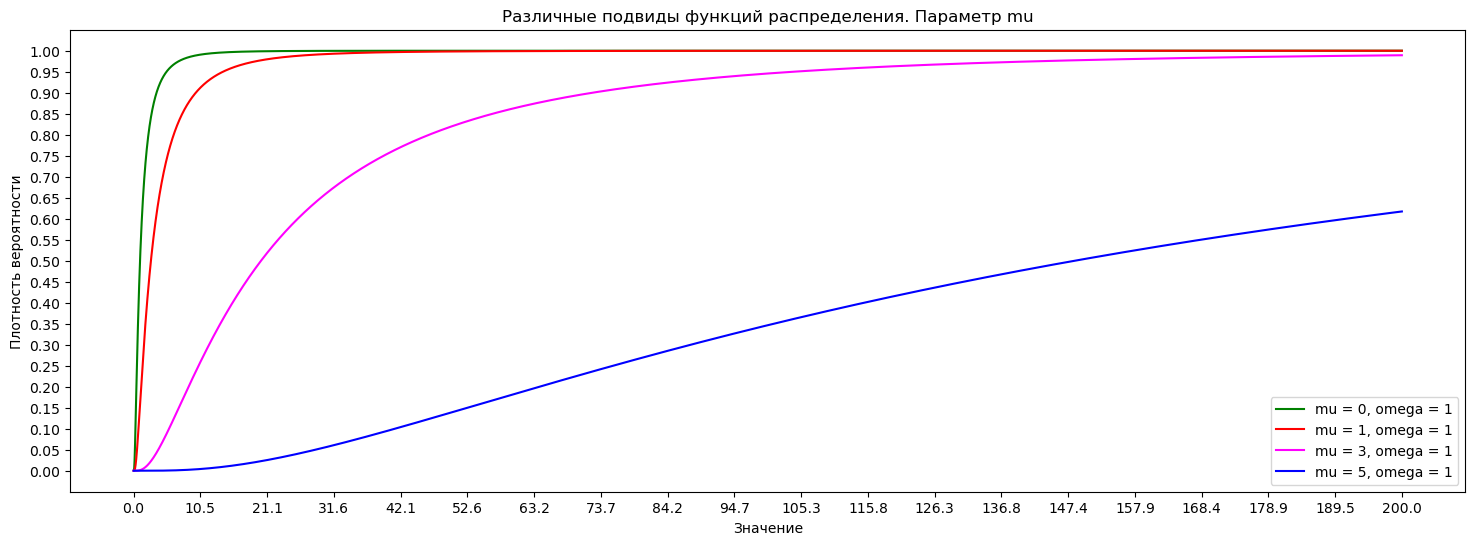

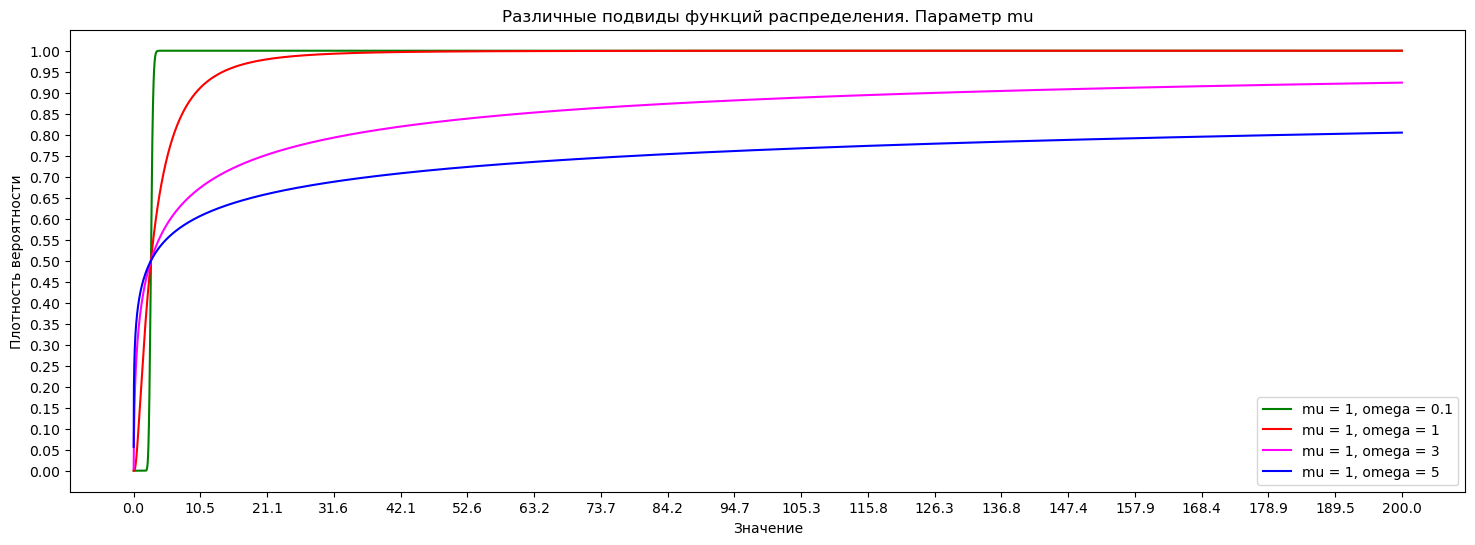

In [338]:
mu = 0
sco = 1
Y_real_0 = [F_real(x, 0, sco) for x in X]
Y_real_1 = [F_real(x, 1, sco) for x in X]
Y_real_3 = [F_real(x, 3, sco) for x in X]
Y_real_5 = [F_real(x, 5, sco) for x in X]

fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(X, Y_real_0, color='green', label=f'mu = 0, omega = 1')
ax.plot(X, Y_real_1, color='red', label=f'mu = 1, omega = 1')
ax.plot(X, Y_real_3, color='magenta', label=f'mu = 3, omega = 1')
ax.plot(X, Y_real_5, color='blue', label=f'mu = 5, omega = 1')
# ax.plot(X_biased, Y_real_biased, color='blue', label=f'Real biassed function')
# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –≤–Ω–µ—à–Ω–µ–≥–æ –≤–∏–¥–∞ –≥—Ä–∞—Ñ–∏–∫–∞
ax.set_xlabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
ax.set_ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏')
ax.set_title(f'–†–∞–∑–ª–∏—á–Ω—ã–µ –ø–æ–¥–≤–∏–¥—ã —Ñ—É–Ω–∫—Ü–∏–π —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. –ü–∞—Ä–∞–º–µ—Ç—Ä mu')
ax.set_xticks(xt)
ax.set_yticks(yt)
ax.legend()

# –í—ã–≤–æ–¥ –≥—Ä–∞—Ñ–∏–∫–∞ –Ω–∞ —ç–∫—Ä–∞–Ω
plt.show()

mu = 1
Y_real_0 = [F_real(x, 1, 0.1) for x in X]
Y_real_1 = [F_real(x, 1, 1) for x in X]
Y_real_3 = [F_real(x, 1, 3) for x in X]
Y_real_5 = [F_real(x, 1, 5) for x in X]

fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(X, Y_real_0, color='green', label=f'mu = 1, omega = 0.1')
ax.plot(X, Y_real_1, color='red', label=f'mu = 1, omega = 1')
ax.plot(X, Y_real_3, color='magenta', label=f'mu = 1, omega = 3')
ax.plot(X, Y_real_5, color='blue', label=f'mu = 1, omega = 5')
# ax.plot(X_biased, Y_real_biased, color='blue', label=f'Real biassed function')
# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –≤–Ω–µ—à–Ω–µ–≥–æ –≤–∏–¥–∞ –≥—Ä–∞—Ñ–∏–∫–∞
ax.set_xlabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
ax.set_ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏')
ax.set_title(f'–†–∞–∑–ª–∏—á–Ω—ã–µ –ø–æ–¥–≤–∏–¥—ã —Ñ—É–Ω–∫—Ü–∏–π —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. –ü–∞—Ä–∞–º–µ—Ç—Ä mu')
ax.set_xticks(xt)
ax.set_yticks(yt)
ax.legend()

# –í—ã–≤–æ–¥ –≥—Ä–∞—Ñ–∏–∫–∞ –Ω–∞ —ç–∫—Ä–∞–Ω
plt.show()